In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import copy

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [2]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [38]:
def call_di(S, H, K, T, r, q, sigma):
    if S > H:
        return C + E
    else:
        return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)
print(phi, S, b, r, T, H, mu, eta, y1, K, sigma, 'C= ', C)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))

print('Literals', A,B,C,D,E,F)

print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

1 100 0.04 0.08 0.5 100 -0.05555555555555553 1 0.6970211552759247 90 0.3 C=  14.881620804968748
Literals 14.881620804968748 13.963273258771451 14.881620804968748 13.963273258771451 0.0 3.0
down-and-in call =  14.881620804968748


In [45]:
barrier_option(S=100, H=95, K=90, R=3, T=0.5, r=0.08, b=0.04, q=0, sigma=0.3, option_type='call', barrier_type='ui')

1 100 0.04 0.08 0.5 95 -0.05555555555555553 -1 0.2134233380647929 90 0.3
Literals  14.881620804968748 14.651640699409505 -6.471551803332957 13.963273258771451 -0.571889593289327 3.6142338020894123


34.514576168224586

В условиях примера 1 напишите универсальную функцию для оценки стоиимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу: 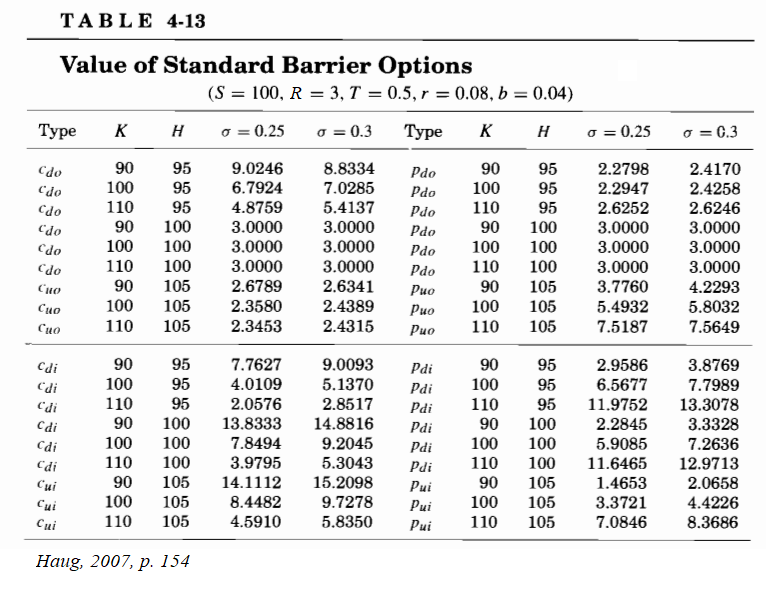

In [ ]:
calc_literals(S, H, K, R, T, r, b, q, sigma, eta, phi)

In [83]:
def calc_literals(
    S, H, K, R, T, r, b, q, sigma, eta, phi
):
    mu = (b - sigma**2/2)/(sigma**2)
    lam = np.sqrt(mu**2 + 2*r/(sigma**2))

    x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
    x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

    y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
    y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

    z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

    A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1) - \
        phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

    B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2) - \
        phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

    C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
            phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)
    # print(phi, S, b, r, T, H, mu, eta, y1, K, sigma)

    E = R*np.exp((b-r)*T)*( norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                                norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

    F = R*( (H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))
    
    # print('Literals ', A, B, C, D, E, F)
    
    return A, B, C, D, E, F

In [84]:
def call_di(S, H, K, T, r, q, sigma, A, B, C, D, E, F):
    if K > H:
        return C + E
    else:
        return A - B + D + E

def call_do(S, H, K, T, r, q, sigma, A, B, C, D, E, F):
    if K > H:
        return A - C + F
    else:
        return B - D + F

def call_ui(S, H, K, T, r, q, sigma, A, B, C, D, E, F):
    if K > H:
        return A + E
    else:
        return B - C + D + E

def call_uo(S, H, K, T, r, q, sigma, A, B, C, D, E, F):
    if K > H:
        return F
    else:
        return A - B + C - D + F

barrier_calls = {'di': call_di, 'do': call_do, 'ui': call_ui, 'uo': call_uo}

def put_di(S, H, K, T, r, q, sigma, A, B, C, D, E, F):
    if K > H:
        return B - C + D + E
    else:
        return A + E

def put_do(S, H, K, T, r, q, sigma, A, B, C, D, E, F):
    if K > H:
        return A - B + C - D + F
    else:
        return F

def put_ui(S, H, K, T, r, q, sigma, A, B, C, D, E, F):
    if K > H:
        return A - B + D + E
    else:
        return C + E

def put_uo(S, H, K, T, r, q, sigma, A, B, C, D, E, F):
    if K > H:
        return B - D + F
    else:
        return A - C + F

barrier_puts = {'di': put_di, 'do': put_do, 'ui': put_ui, 'uo': put_uo}

In [85]:
call_put_params_dict = { # (x1, x2) == eta, phi
    'call': {
        'di': (1, 1), 'ui': (-1, 1), 'do': (1, 1), 'uo': (-1, 1)
    },
    'put': {
        'di': (1, -1), 'ui': (-1, -1), 'do': (1, -1), 'uo': (-1, -1)
    }
}

def barrier_call(
    S, H, K, R, T, r, b, q, sigma, eta, phi, barrier_type = 'di'
):
    assert barrier_type in list(barrier_calls.keys()), f'Unexpected barrier option type! Required {list(barrier_calls.keys())}, got {barrier_type}'
    call_func = barrier_calls[barrier_type]
    A, B, C, D, E, F = calc_literals(S, H, K, R, T, r, b, q, sigma, eta, phi)
    return call_func(S, H, K, T, r, q, sigma, A, B, C, D, E, F)

def barrier_put(
    S, H, K, R, T, r, b, q, sigma, eta, phi, barrier_type = 'di'
):
    assert barrier_type in list(barrier_puts.keys()), f'Unexpected barrier option type! Required {list(barrier_puts.keys())}, got {barrier_type}'
    call_func = barrier_puts[barrier_type]
    A, B, C, D, E, F = calc_literals(S, H, K, R, T, r, b, q, sigma, eta, phi)
    return call_func(S, H, K, T, r, q, sigma, A, B, C, D, E, F)

options = {'call': barrier_call, 'put': barrier_put}
def barrier_option(
    S, H, K, R, T, r, b, q, sigma, option_type: str = 'call', barrier_type = 'di',
):
    assert option_type in list(options.keys()), f'Incorrect option type! Required {list(options.keys())}, got {option_type}'
    eta, phi = call_put_params_dict[option_type][barrier_type]
    option = options[option_type]
    return option(S, H, K, R, T, r, b, q, sigma, eta, phi, barrier_type)

В условиях примера 1 напишите универсальную функцию для оценки стоиимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу: 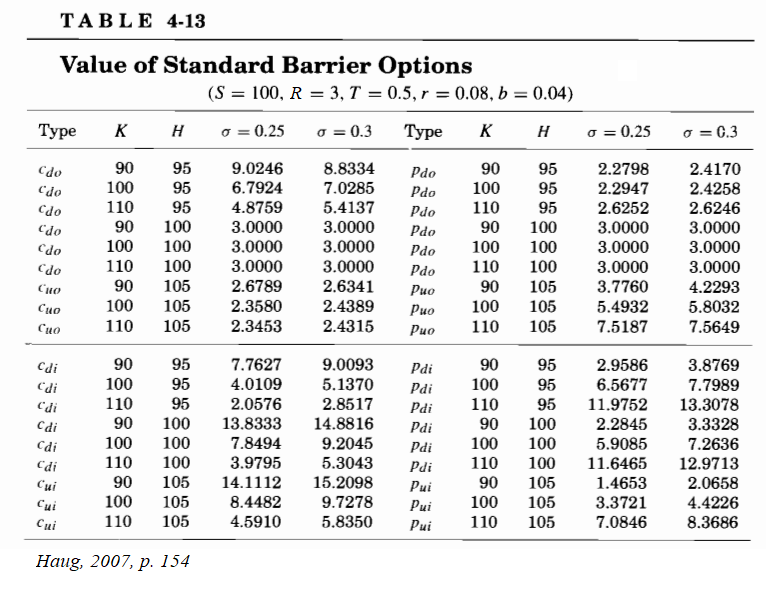

In [126]:
S = 100
R = 3
T = 0.5
r = 0.08
b = 0.04

K = 110
H = 105
sigma = 0.3
q = r - b

In [127]:
barrier_options(S, H, K, R, T, r, q, sigma, option_type='put', barrier_type='ui')

5.821245405603484

In [128]:
barrier_option(S, H, K, R, T, r, b, q, sigma, option_type='put', barrier_type='ui')

14.705998842979888

In [149]:
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

def put(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S


def barrier_options(S, H, K, R, T, r, q, sigma, option_type = 'call', barrier_type = 'di'):
    if H <= K:
        # H <= K
        def call_di(S, K, H, T, sigma, r, q):
            lam = (r - q + sigma**2 / 2) / sigma**2
            y = np.log(H**2 / S / K) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            
            f = S * np.exp(-q * T) * (H / S) ** (2 * lam) * norm.cdf(y)
            s = -K * np.exp(-r * T) * (H / S) ** (2 * lam - 2) * norm.cdf(y - sigma * np.sqrt(T))
            return f + s

        def call_do(S, K, H, T, sigma, r, q):
            return call(S, K, T, sigma, r, q) - call_di(S, K, H, T, sigma, r, q)
        
        def call_ui(S, K, H, T, sigma, r, q):
            return call(S, K, T, sigma, r, q)
        def call_uo(S, K, H, T, sigma, r, q):
            return R #call(S, K, T, sigma, r, q) - call_ui(S, K, H, T, sigma, r, q)
        
        def put_uo(S, K, H, T, sigma, r, q):
            lam = (r - q + sigma**2 / 2) / sigma**2
            y = np.log(H**2 / S / K) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            x1 = np.log(S / H) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            y1 = np.log(H / S) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            
            fst = -S * norm.cdf(-x1) * np.exp(-q * T)
            snd = K * np.exp(-r * T) * norm.cdf(-x1 + sigma * np.sqrt(T))
            trd = S * np.exp(-q * T) * (H / S)**(2 * lam) * norm.cdf(-y1)
            frt = -K * np.exp(-r * T) * (H / S)**(2 * lam - 2) * norm.cdf(-y1 + sigma * np.sqrt(T))
            return fst + snd + trd + frt
        
        def put_ui(S, K, H, T, sigma, r, q):
            return put(S, K, T, sigma, r, q) - put_uo(S, K, H, T, sigma, r, q)
        
        def put_di(S, K, H, T, sigma, r, q):
            lam = (r - q + sigma**2 / 2) / sigma**2
            y = np.log(H**2 / S / K) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            x1 = np.log(S / H) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            y1 = np.log(H / S) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            
            fst = -S * np.exp(-q * T) * norm.cdf(-x1)
            snd = K * np.exp(-r * T) * norm.cdf(-x1 + sigma * np.sqrt(T))
            trd = S * np.exp(-q * T) * (H / S)**(2 * lam) * (norm.cdf(y) - norm.cdf(y1))
            frd = -K * np.exp(-r * T) * (H / S)**(2 * lam - 2) * (norm.cdf(y - sigma * np.sqrt(T)) - norm.cdf(y1 - sigma * np.sqrt(T)))
            return fst + snd + trd + frd
        
        def put_do(S, K, H, T, sigma, r, q):
            return put(S, K, T, sigma, r, q) - put_di(S, K, H, T, sigma, r, q)
            
    else:

        # H > K
        def call_do(S, K, H, T, sigma, r, q):
            lam = (r - q + sigma**2 / 2) / sigma**2
            y = np.log(H**2 / S / K) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)

            x1 = np.log(S / H) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            y1 = np.log(H / S) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)

            fst = S * norm.cdf(x1) * np.exp(-q * T)
            snd = -K * np.exp(-r * T) * norm.cdf(x1 - sigma * np.sqrt(T))
            trd = -S * np.exp(-q * T) * (H / S) ** (2 * lam) * norm.cdf(y1)
            frt = K * np.exp(-r * T) * (H / S) ** (2 * lam - 2) * norm.cdf(y1 - sigma * np.sqrt(T))
            return fst + snd + trd + frt

        def call_di(S, K, H, T, sigma, r, q):
            return call(S, K, T, sigma, r, q) - call_do(S, K, H, T, sigma, r, q)

        # H > K
        def call_ui(S, K, H, T, sigma, r, q):
            x1 = np.log(S / H) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            y = np.log(H**2 / S / K) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            y1 = np.log(H / S) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)

            fst = S * np.exp(-q * T) * norm.cdf(x1)
            snd = -K * np.exp(-r * T) * norm.cdf(x1 - sigma * np.sqrt(T))
            trd = -S * np.exp(-q * T) * (H / S) ** (2 * lam) * (norm.cdf(-y) - norm.cdf(-y1))
            frt = K * np.exp(-r * T) * (H / S) ** (2 * lam - 2) * \
                (norm.cdf(-y + sigma * np.sqrt(T)) - norm.cdf(-y1 + sigma * np.sqrt(T)))
            return fst + snd + trd + frt

        def call_uo(S, K, H, T, sigma, r, q):
            return call(S, K, T, sigma, r, q) - call_ui(S, K, H, T, sigma, r, q)
        
        def put_ui(S, K, H, T, sigma, r, q):
            lam = (r - q + sigma**2 / 2) / sigma**2
            y = np.log(H**2 / S / K) / sigma / np.sqrt(T) + lam * sigma * np.sqrt(T)
            
            fst = -S * np.exp(-q * T) * (H / S)**(2 * lam) * norm.cdf(-y)
            snd = K * np.exp(-r * T) * (H / S)**(2 * lam - 2) * norm.cdf(-y + sigma * np.sqrt(T))
            return fst + snd
        
        def put_uo(S, K, H, T, sigma, r, q):
            return put(S, K, T, sigma, r, q) - put_ui(S, K, H, T, sigma, r, q)
        
        def put_do(S, K, H, T, sigma, r, q):
            return R #put(S, K, T, sigma, r, q) - put_ui(S, K, H, T, sigma, r, q)
        def put_di(S, K, H, T, sigma, r, q):
            return put(S, K, T, sigma, r, q)
        
    assert option_type in ['call', 'put']
    assert barrier_type in ['ui', 'uo', 'di', 'do']
    if option_type=='call':
        bs = {'ui': call_ui, 'uo': call_uo, 'di': call_di, 'do': call_do}
    elif option_type=='put':
        bs = {'ui': put_ui, 'uo': put_uo, 'di': put_di, 'do': put_do}

    return bs[barrier_type](S, K, H, T, sigma, r, q)

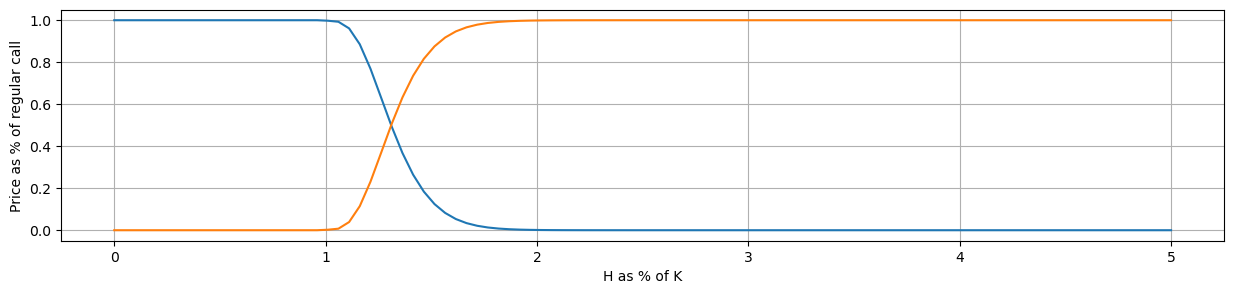

In [146]:
Hs = np.linspace(0, 5* K, 100)
call_ins = np.fromiter((barrier_options(S, h, K, R, T, r, q, sigma, option_type = 'call', barrier_type = 'ui') for h in Hs), dtype=np.float32)
call_outs = np.fromiter((barrier_options(S, h, K, R, T, r, q, sigma, option_type = 'call', barrier_type = 'uo') for h in Hs), dtype=np.float32)
calls = call(S, K, T, sigma, r, q)
plt.figure(figsize=(15,3))
plt.plot(Hs/K, call_ins/calls)
plt.plot(Hs/K, call_outs/calls)
plt.grid()
plt.xlabel('H as % of K')
plt.ylabel('Price as % of regular call')
plt.show()

Задача 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день. Сравните полученные результаты с результатами, полученными при использовании гэп опционов, бинарных опционов. Подкрепите выводы иллюстративными графиками.

In [208]:
# оценка стоимости бинарного опциона колл
def binary_option_call(t, S, K, T, r, q, sigma):

    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
        return np.exp(-r*T)*norm.cdf(d2)
    if t == 'asset-or-nothing':
        return S*np.exp(-q*T)*norm.cdf(d1)

# оценка стоимости бинарного опциона пут
def binary_option_put(t, S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
        return np.exp(-r*T)*norm.cdf(-d2)
    if t == 'asset-or-nothing':
        return S*np.exp(-q*T)*norm.cdf(-d1)
    
# оценка стоимости гэп опциона
def gap_option_price(S, K1, K2, T, r, q, sigma):
    d1 = (np.log(S/K2) + (r - q + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    c = S  * np.exp(-q * T) * norm.cdf(d1) - K1 * np.exp(-r * T) * norm.cdf(d2)
    p = K1 * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return c, p

Risk part =  3439.5
Call ui price =  7.818 , PR =  0.44
Call ui price =  2.919 , PR =  1.178
количество опционных стратегий 10232
максимальная доходность, годовых =  1.20464
максимальная доходность, непрерывно =  0.7905642302634559
Gap option price =  -4.49


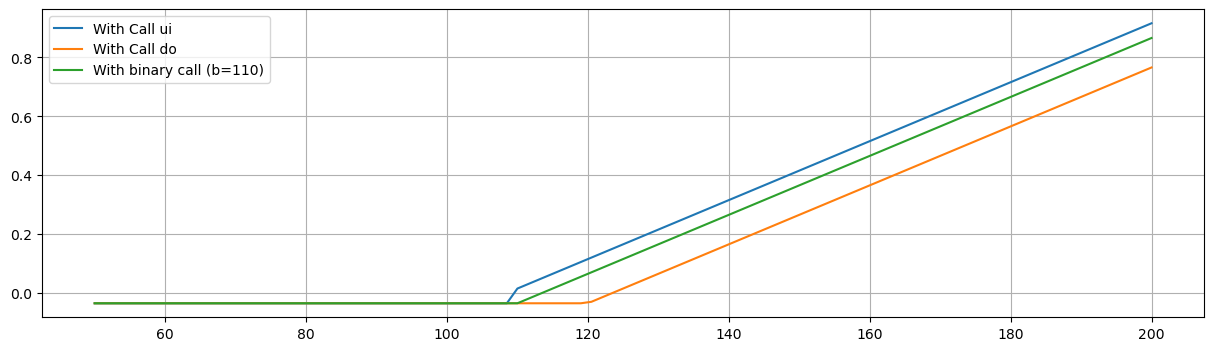

In [215]:
# task 1 

N = 100_000
S = 100
R = 3
T = 0.5
r = 0.07
b = 0.04
sigma = 0.3
q = 0

risk_part = N - N * np.exp(-r * T)
print('Risk part = ', round(risk_part, 1))

# a) call di
K = 105
H = 110
option_type = 'call'
barrier_type = 'ui'
c_ui = barrier_options(S, H, K, R, T, r, q, sigma, option_type=option_type, barrier_type=barrier_type)
PR = S * round(risk_part / c_ui) / N
print('Call ui price = ', round(c_ui, 3), ', PR = ', PR)

n = 101
underlying_asset = np.linspace(0.5 * S, 2 * S, n)
underlying_asset_barrier = copy.deepcopy(underlying_asset)
underlying_asset_barrier[underlying_asset_barrier < H] = 0
option_profit = np.maximum(0, underlying_asset_barrier - K) / S
struct_product_profit = option_profit - round(risk_part / c_ui) * c_ui / N
plt.figure(figsize=(15,4))
plt.plot(underlying_asset, struct_product_profit, label='With Call ui')
# plt.grid(); plt.legend()

# b) call do 
K = 120
H = 90
option_type = 'call'
barrier_type = 'do'
c_do = barrier_options(S, H, K, R, T, r, q, sigma, option_type=option_type, barrier_type=barrier_type)
PR = S * round(risk_part / c_do) / N
print('Call ui price = ', round(c_do, 3), ', PR = ', PR)

underlying_asset_barrier = copy.deepcopy(underlying_asset)
option_profit = np.maximum(0, underlying_asset_barrier - K) / S
struct_product_profit = option_profit - round(risk_part / c_do) * c_do / N
plt.plot(underlying_asset, struct_product_profit, label='With Call do')
plt.grid(); plt.legend()

C = 110
b110 = binary_option_call('cash-or-nothing', S, C, T, r, q, sigma)
Q = round(risk_part/b110)
print('количество опционных стратегий', Q)
print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

option_profit = np.maximum(0, underlying_asset - C) / S
struct_product_profit = option_profit - round(risk_part / b110) * b110 / N
plt.plot(underlying_asset, struct_product_profit, label='With binary call (b=110)')
plt.legend()

gap_option = gap_option_price(S, K, H, T, r, q, sigma)[0] # negative price ~~ ???
print('Gap option price = ', round(gap_option, 3))

plt.show()

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [199]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95


d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.733874868545689
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [200]:
S = 100
H = 95
K = 92

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95


d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  4.868988981398975
rebate =  0.448464125401398
